In [9]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('/content/drive/MyDrive/senior_thesis/MT_Bench/thetas_mtbench.csv')

In [12]:
data.head()

,Unnamed: 0,Model,IFEval,Big_Bench_Hard,MuSR,Theta
0,0,flan-t5-base,18.91,11.34,3.22,-0.978835
1,1,flan-t5-small,15.24,6.36,10.37,-1.001842
2,2,gemma-1.1-2b-it,30.67,5.86,2.02,-0.580959
3,3,gemma-2-2b-it,56.68,17.98,7.08,-0.635686
4,4,llama-3-8b-it,74.08,28.24,1.60,0.414844


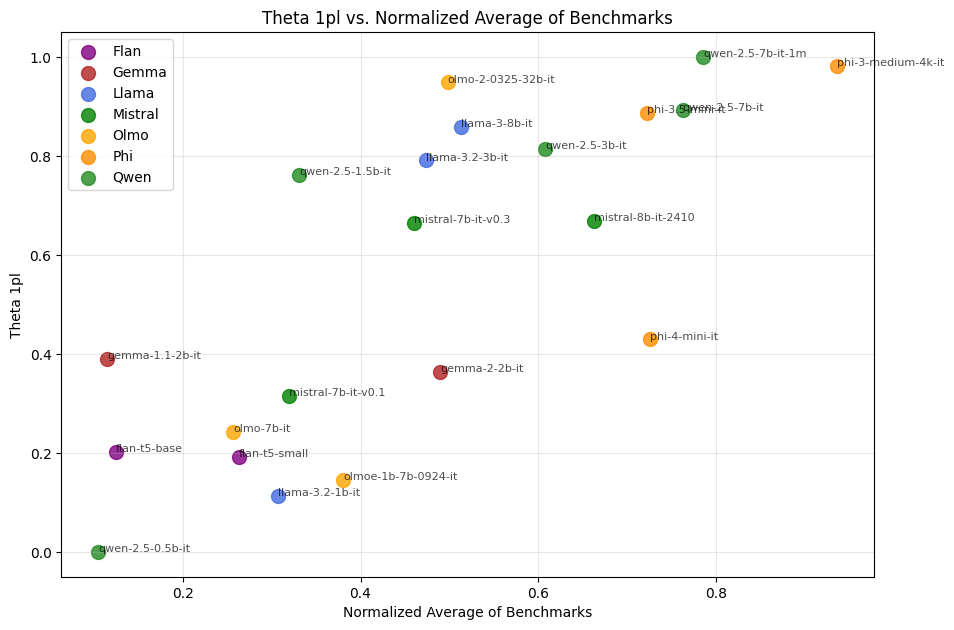

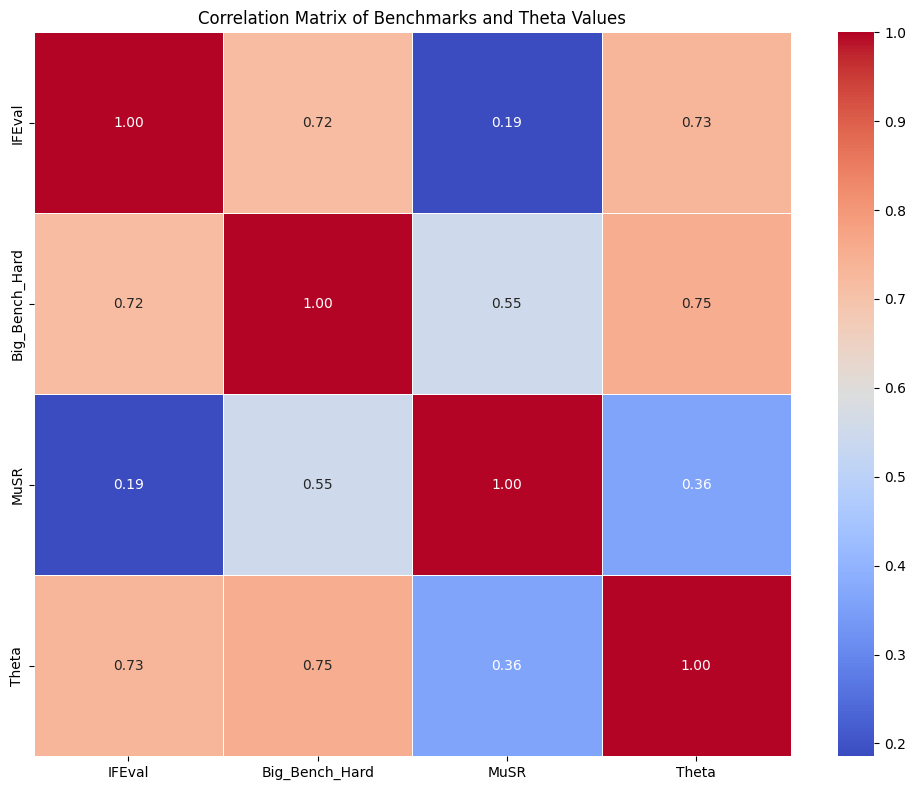

Correlation Analysis:

Theta correlations:
  with IFEval: r = 0.7333, p-value = 0.0002
  with Big_Bench_Hard: r = 0.7537, p-value = 0.0001
  with MuSR: r = 0.3619, p-value = 0.1069
  with Avg_Norm_Benchmark: r = 0.7645, p-value = 0.0001


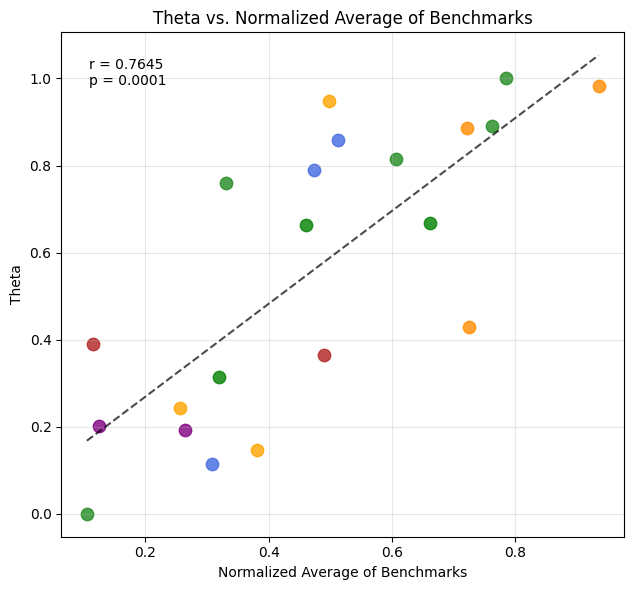


Summary Table:
              Model  IFEval  Big_Bench_Hard  MuSR  Avg_Norm_Benchmark    Theta
 phi-3-medium-4k-it   64.23           49.38 13.05            0.936094 0.982111
  qwen-2.5-7b-it-1m   74.48           35.03  9.52            0.785389 1.000000
     qwen-2.5-7b-it   75.85           34.89  8.45            0.762399 0.891616
      phi-4-mini-it   73.78           38.74  6.45            0.725453 0.429629
    phi-3.5-mini-it   57.75           36.75 10.10            0.722519 0.886610
 mistral-8b-it-2410   58.96           25.82 10.72            0.662523 0.668946
     qwen-2.5-3b-it   64.75           25.80  7.57            0.607508 0.814381
      llama-3-8b-it   74.08           28.24  1.60            0.513181 0.858584
 olmo-2-0325-32b-it   72.44           16.33  4.69            0.497993 0.948240
      gemma-2-2b-it   56.68           17.98  7.08            0.489742 0.364293
    llama-3.2-3b-it   73.93           24.06  1.37            0.474009 0.790933
 mistral-7b-it-v0.3   54.65         

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(data)

# Calculate the normalized average of benchmarks (IFEval, Big_Bench_Hard, MuSR)
# First, normalize each benchmark column independently
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df['IFEval_norm'] = min_max_normalize(df['IFEval'])
df['Big_Bench_Hard_norm'] = min_max_normalize(df['Big_Bench_Hard'])
df['MuSR_norm'] = min_max_normalize(df['MuSR'])

# Calculate the average of normalized benchmarks
df['Avg_Norm_Benchmark'] = (df['IFEval_norm'] + df['Big_Bench_Hard_norm'] + df['MuSR_norm']) / 3

# Normalize the theta columns as well (optional, but helps for visualization)
# df['Theta_GRM_norm'] = min_max_normalize(df['Theta_GRM'])
# df['Theta_2pl_norm'] = min_max_normalize(df['Theta_2pl'])
# df['Theta_1pl_norm'] = min_max_normalize(df['Theta_1pl'])
df['Theta'] = min_max_normalize(df['Theta'])

# Create a plot with multiple subplots for each theta vs the average benchmark
plt.figure(figsize=(18, 12))

# Setup a color palette based on model families
def get_model_family(model_name):
    if 'llama' in model_name.lower():
        return 'Llama'
    elif 'qwen' in model_name.lower():
        return 'Qwen'
    elif 'gemma' in model_name.lower():
        return 'Gemma'
    elif 'phi' in model_name.lower():
        return 'Phi'
    elif 'flan' in model_name.lower():
        return 'Flan'
    elif 'gpt' in model_name.lower():
        return 'GPT'
    elif 'mistral' in model_name.lower():
        return 'Mistral'
    elif 'flan' in model_name.lower():
        return 'Flan'
    elif 'olmo' in model_name.lower():
        return 'Olmo'
    else:
        return 'Other'

df['Model_Family'] = df['Model'].apply(get_model_family)
family_colors = {'Llama': 'royalblue', 'Qwen': 'forestgreen', 'Gemma': 'firebrick',
                 'Phi': 'darkorange', 'Flan': 'purple', 'GPT': 'red', 'Olmo':'orange',
                 'Mistral':'green', 'Other': 'gray'}

# # Subplot 1: Theta GRM vs Average Benchmark
# plt.subplot(2, 2, 1)
# for family in df['Model_Family'].unique():
#     family_df = df[df['Model_Family'] == family]
#     plt.scatter(family_df['Avg_Norm_Benchmark'], family_df['Theta_GRM'],
#                 label=family, color=family_colors[family], s=100, alpha=0.8)

# for i, row in df.iterrows():
#     plt.annotate(row['Model'], (row['Avg_Norm_Benchmark'], row['Theta_GRM']),
#                 fontsize=8, alpha=0.7)

# plt.xlabel('Normalized Average of Benchmarks')
# plt.ylabel('Theta GRM')
# plt.title('Theta GRM vs. Normalized Average of Benchmarks')
# plt.grid(True, alpha=0.3)
# plt.legend()

# # Subplot 2: Theta 2pl vs Average Benchmark
# plt.subplot(2, 2, 2)
# for family in df['Model_Family'].unique():
#     family_df = df[df['Model_Family'] == family]
#     plt.scatter(family_df['Avg_Norm_Benchmark'], family_df['Theta_2pl'],
#                 label=family, color=family_colors[family], s=100, alpha=0.8)

# for i, row in df.iterrows():
#     plt.annotate(row['Model'], (row['Avg_Norm_Benchmark'], row['Theta_2pl']),
#                 fontsize=8, alpha=0.7)

# plt.xlabel('Normalized Average of Benchmarks')
# plt.ylabel('Theta 2pl')
# plt.title('Theta 2pl vs. Normalized Average of Benchmarks')
# plt.grid(True, alpha=0.3)
# plt.legend()

# Subplot 3: Theta 1pl vs Average Benchmark
plt.subplot(2, 2, 3)
for family in df['Model_Family'].unique():
    family_df = df[df['Model_Family'] == family]
    plt.scatter(family_df['Avg_Norm_Benchmark'], family_df['Theta'],
                label=family, color=family_colors[family], s=100, alpha=0.8)

for i, row in df.iterrows():
    plt.annotate(row['Model'], (row['Avg_Norm_Benchmark'], row['Theta']),
                fontsize=8, alpha=0.7)

plt.xlabel('Normalized Average of Benchmarks')
plt.ylabel('Theta 1pl')
plt.title('Theta 1pl vs. Normalized Average of Benchmarks')
plt.grid(True, alpha=0.3)
plt.legend()

# # Subplot 4: All Thetas vs Average Benchmark (combined view)
# plt.subplot(2, 2, 4)
# plt.scatter(df['Avg_Norm_Benchmark'], df['Theta_GRM'], label='Theta GRM', marker='o', s=80, alpha=0.7)
# plt.scatter(df['Avg_Norm_Benchmark'], df['Theta_2pl'], label='Theta 2pl', marker='^', s=80, alpha=0.7)
# plt.scatter(df['Avg_Norm_Benchmark'], df['Theta_1pl'], label='Theta 1pl', marker='s', s=80, alpha=0.7)

# plt.xlabel('Normalized Average of Benchmarks')
# plt.ylabel('Theta Values')
# plt.title('All Theta Values vs. Normalized Average of Benchmarks')
# plt.grid(True, alpha=0.3)
# plt.legend()

plt.tight_layout()
plt.savefig('model_thetas_vs_benchmarks.png', dpi=300)
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_columns = ['IFEval', 'Big_Bench_Hard', 'MuSR', 'Theta']
correlation_matrix = df[correlation_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Benchmarks and Theta Values')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

# Let's also look at the numerical relationship by calculating linear regression
from scipy import stats

# Print correlation coefficients and p-values
print("Correlation Analysis:")
for theta in ['Theta']:
    print(f"\n{theta} correlations:")
    for benchmark in ['IFEval', 'Big_Bench_Hard', 'MuSR', 'Avg_Norm_Benchmark']:
        corr, p_value = stats.pearsonr(df[benchmark], df[theta])
        print(f"  with {benchmark}: r = {corr:.4f}, p-value = {p_value:.4f}")

# Scatterplot with regression line for each theta vs the average benchmark
plt.figure(figsize=(18, 6))

thetas = ['Theta']
# thetas = ['Theta_GRM', 'Theta_2pl', 'Theta_1pl']
for i, theta in enumerate(thetas, 1):
    plt.subplot(1, 3, i)

    # Add regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Avg_Norm_Benchmark'], df[theta])
    x = np.linspace(df['Avg_Norm_Benchmark'].min(), df['Avg_Norm_Benchmark'].max(), 100)
    y = slope * x + intercept

    # Plot points by model family
    for family in df['Model_Family'].unique():
        family_df = df[df['Model_Family'] == family]
        plt.scatter(family_df['Avg_Norm_Benchmark'], family_df[theta],
                   label=family, color=family_colors[family], s=80, alpha=0.8)

    plt.plot(x, y, 'k--', alpha=0.7)
    plt.text(0.05, 0.95, f'r = {r_value:.4f}\np = {p_value:.4f}',
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

    plt.xlabel('Normalized Average of Benchmarks')
    plt.ylabel(theta)
    plt.title(f'{theta} vs. Normalized Average of Benchmarks')
    plt.grid(True, alpha=0.3)

    if i == 3:  # Only show legend for the last plot to save space
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('regression_analysis.png', dpi=300)
plt.show()

# Print the summary table
print("\nSummary Table:")
summary_df = df[['Model', 'IFEval', 'Big_Bench_Hard', 'MuSR', 'Avg_Norm_Benchmark',
                 'Theta']].copy()
summary_df = summary_df.sort_values('Avg_Norm_Benchmark', ascending=False)
print(summary_df.to_string(index=False))